![q](pic/q1_1.png)

![s](pic/q1a_1.jpg)

![s](pic/q1a_2.jpg)

![s](pic/q1a_3.jpg)

![q](pic/q1_2.png)

![s](pic/q1a_4.jpg)

![s](pic/q1a_5.jpg)

![q](pic/q2.png)

Epoch [10/1000] Train Loss: 1.5172 Val Loss: 1.1962
Epoch [20/1000] Train Loss: 0.6869 Val Loss: 0.9760
Epoch [30/1000] Train Loss: 1.1388 Val Loss: 0.8555
Epoch [40/1000] Train Loss: 0.5846 Val Loss: 0.7718
Epoch [50/1000] Train Loss: 0.6386 Val Loss: 0.7104
Epoch [60/1000] Train Loss: 0.7176 Val Loss: 0.6610
Epoch [70/1000] Train Loss: 0.3893 Val Loss: 0.6227
Epoch [80/1000] Train Loss: 0.5077 Val Loss: 0.5948
Epoch [90/1000] Train Loss: 0.4340 Val Loss: 0.5717
Epoch [100/1000] Train Loss: 0.4538 Val Loss: 0.5547
Epoch [110/1000] Train Loss: 0.3437 Val Loss: 0.5422
Epoch [120/1000] Train Loss: 0.4854 Val Loss: 0.5331
Epoch [130/1000] Train Loss: 0.4482 Val Loss: 0.5260
Epoch [140/1000] Train Loss: 0.4762 Val Loss: 0.5206
Epoch [150/1000] Train Loss: 0.4783 Val Loss: 0.5161
Epoch [160/1000] Train Loss: 0.3977 Val Loss: 0.5129
Epoch [170/1000] Train Loss: 0.4017 Val Loss: 0.5109
Epoch [180/1000] Train Loss: 0.5850 Val Loss: 0.5080
Epoch [190/1000] Train Loss: 0.6187 Val Loss: 0.5056
Ep

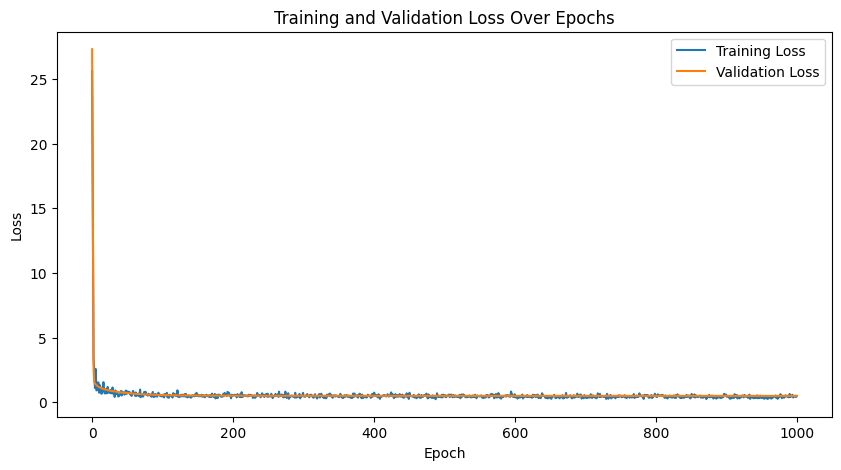

Test Loss: 0.4980
Mean Absolute Error (MAE): 0.5522
Root Mean Squared Error (RMSE): 0.7057


In [73]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load the UCI Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=";")
wine_features = wine_data.drop(columns=["quality"])
wine_target = wine_data["quality"]

# Standardize features, data pre-processing
scaler = StandardScaler() ## ??
wine_features = scaler.fit_transform(wine_features) ## ??

# Split the data into training, validation, and testing sets (64-16-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(wine_features, wine_target, test_size=0.36, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5556, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# Define the neural network architecture
class WineQualityRegressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(WineQualityRegressor, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.hidden3 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64
model = WineQualityRegressor(input_size, hidden_size)

# Define custom batch size and learning rate
batch_size = 64
learning_rate = 0.001

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 1000
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {loss.item():.4f} Val Loss: {val_loss.item():.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(torch.FloatTensor(X_test))
    test_loss = criterion(test_outputs, y_test)
    mae = mean_absolute_error(y_test, test_outputs.numpy())
    rmse = np.sqrt(mean_squared_error(y_test, test_outputs.numpy()))

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

I think my model fits the data well, because the final value of loss is very small.
I think it is not good to use continuous label to treat the wine quality because I think the wine quality label should be treated as classification label.

![q](pic/q3.png)

In [26]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Define a function for training and evaluating the model with different hyperparameters
def train_evaluate(model, optimizer_name, gamma, learning_rate, batch_size, train_loader, val_loader):
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    scheduler = StepLR(optimizer, step_size=30, gamma=gamma)

    # Training loop
    num_epochs = 300
    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        train_loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {loss.item():.4f} Val Loss: {val_loss.item():.4f}")

    return train_loss_history, val_loss_history

# Define hyperparameter combinations to explore
optimizers = ['SGD', 'Adam']
gammas = [0.1, 0.001, 0.0001]
learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [16, 160, 1600]

# Perform the experiment
results = {}
best_loss = 100
for optimizer_name in optimizers:
    for gamma in gammas:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                key = f"{optimizer_name}_gamma{gamma}_lr{learning_rate}_batch{batch_size}"
                print(f"Training {key}...")
                model = WineQualityRegressor(input_size, hidden_size)
                train_loss, val_loss = train_evaluate(model, optimizer_name, gamma, learning_rate, batch_size, train_loader, val_loader)
                if val_loss[-1] < best_loss:
                    best_loss = val_loss[-1]
                    torch.save(model.state_dict(), 'best_model.pth')
                results[key] = {
                    'train_loss': train_loss,
                    'val_loss': val_loss
                }

# Evaluate on the test set
test_losses = {}
for key, result in results.items():
    model.load_state_dict(torch.load('best_model.pth'))  # Load the best model weights
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
    test_losses[key] = test_loss.item()

# Print test losses
for key, test_loss in test_losses.items():
    print(f"{key} Test Loss: {test_loss:.4f}")

Training SGD_gamma0.1_lr0.01_batch16...
Epoch [50/300] Train Loss: 0.4499 Val Loss: 0.4958
Epoch [100/300] Train Loss: 0.5511 Val Loss: 0.4943
Epoch [150/300] Train Loss: 0.3772 Val Loss: 0.4943
Epoch [200/300] Train Loss: 0.5118 Val Loss: 0.4943
Epoch [250/300] Train Loss: 0.5664 Val Loss: 0.4943
Epoch [300/300] Train Loss: 0.4212 Val Loss: 0.4943
Training SGD_gamma0.1_lr0.01_batch160...
Epoch [50/300] Train Loss: 0.6702 Val Loss: 0.5022
Epoch [100/300] Train Loss: 0.5955 Val Loss: 0.5015
Epoch [150/300] Train Loss: 0.4030 Val Loss: 0.5014
Epoch [200/300] Train Loss: 0.4666 Val Loss: 0.5014
Epoch [250/300] Train Loss: 0.4319 Val Loss: 0.5014
Epoch [300/300] Train Loss: 0.4294 Val Loss: 0.5014
Training SGD_gamma0.1_lr0.01_batch1600...
Epoch [50/300] Train Loss: 0.4555 Val Loss: 0.4870
Epoch [100/300] Train Loss: 0.4017 Val Loss: 0.4864
Epoch [150/300] Train Loss: 0.5282 Val Loss: 0.4864
Epoch [200/300] Train Loss: 0.4618 Val Loss: 0.4864
Epoch [250/300] Train Loss: 0.6337 Val Loss: 0.4

The combination of Adam_gamma0.1_lr0.01_batch1600 is the best. The model is just right, because the train and validation loss are not too different.

![q](pic/q4.png)

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
from torchvision import datasets, transforms
from tqdm import tqdm

In [38]:
# Set parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
m = 784
k = 10
n_epochs = 30
lr = 1e-3

In [39]:
transform = transforms.Compose([transforms.ToTensor()])
data1 = datasets.MNIST("./data", train = True, transform = transform, download = True)
data2 = datasets.MNIST("./data", train = False, transform = transform, download = True)
train_data_loader = torch.utils.data.DataLoader(data1, batch_size = batch_size, shuffle = True)
test_data_loader = torch.utils.data.DataLoader(data2, batch_size = batch_size, shuffle = False)

In [68]:
#  Momentum method with parameter β = 0.9
w = torch.randn((m, k), device = device)*1e-2
w.requires_grad_()

v = torch.zeros((m, k), device = device)

beta = 0.9

criterion = nn.CrossEntropyLoss()

# training
for idx_epoch in range(n_epochs):
    for data, target in tqdm(train_data_loader, ncols=80):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        y_hat = data @ w
        loss = criterion(y_hat, target)

        dw = grad(loss, w)[0]
        v = beta * v - lr * dw
        w = w + v
        
        # print(data.shape, target.shape, w.shape, y_hat.shape, loss.shape, dW.shape)

    num_correct, num_all, loss = 0, 0, 0.
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)
        y_hat = data @ w
        pred_class = torch.argmax(y_hat, dim=1)
        num_correct += torch.sum(pred_class == target)
        num_all += target.shape[0]
        loss += F.cross_entropy(y_hat, target, reduction='sum')
    print('Epoch %d, test accuracy %.4f, loss %.4f' % (idx_epoch, num_correct/num_all, loss/num_all))

100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 279.96it/s]


Epoch 0, test accuracy 0.8831, loss 0.4770


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 284.23it/s]


Epoch 1, test accuracy 0.8948, loss 0.4012


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 274.98it/s]


Epoch 2, test accuracy 0.9000, loss 0.3687


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 249.46it/s]


Epoch 3, test accuracy 0.9054, loss 0.3507


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 264.72it/s]


Epoch 4, test accuracy 0.9069, loss 0.3386


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 270.77it/s]


Epoch 5, test accuracy 0.9096, loss 0.3302


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 260.53it/s]


Epoch 6, test accuracy 0.9107, loss 0.3232


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 229.76it/s]


Epoch 7, test accuracy 0.9125, loss 0.3177


100%|██████████████████████████████████████| 1875/1875 [00:12<00:00, 146.29it/s]


Epoch 8, test accuracy 0.9131, loss 0.3139


100%|███████████████████████████████████████| 1875/1875 [00:19<00:00, 94.66it/s]


Epoch 9, test accuracy 0.9144, loss 0.3103


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 201.22it/s]


Epoch 10, test accuracy 0.9165, loss 0.3072


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 194.61it/s]


Epoch 11, test accuracy 0.9155, loss 0.3063


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 253.22it/s]


Epoch 12, test accuracy 0.9158, loss 0.3027


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 271.06it/s]


Epoch 13, test accuracy 0.9168, loss 0.3005


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 194.24it/s]


Epoch 14, test accuracy 0.9169, loss 0.2995


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 259.01it/s]


Epoch 15, test accuracy 0.9171, loss 0.2978


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 243.53it/s]


Epoch 16, test accuracy 0.9180, loss 0.2961


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 267.09it/s]


Epoch 17, test accuracy 0.9183, loss 0.2950


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 292.99it/s]


Epoch 18, test accuracy 0.9180, loss 0.2940


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 300.02it/s]


Epoch 19, test accuracy 0.9188, loss 0.2927


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 290.62it/s]


Epoch 20, test accuracy 0.9187, loss 0.2918


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 292.39it/s]


Epoch 21, test accuracy 0.9190, loss 0.2908


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 286.59it/s]


Epoch 22, test accuracy 0.9191, loss 0.2896


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 295.46it/s]


Epoch 23, test accuracy 0.9195, loss 0.2894


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 285.11it/s]


Epoch 24, test accuracy 0.9190, loss 0.2887


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 296.13it/s]


Epoch 25, test accuracy 0.9201, loss 0.2878


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 279.97it/s]


Epoch 26, test accuracy 0.9206, loss 0.2875


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 297.44it/s]


Epoch 27, test accuracy 0.9200, loss 0.2865


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 299.49it/s]


Epoch 28, test accuracy 0.9204, loss 0.2867


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 297.12it/s]


Epoch 29, test accuracy 0.9199, loss 0.2858


In [71]:
#  Nesterov’s Accelerated Gradient (NAG) with parameter β = 0.95
w = torch.randn((m, k), device = device)*1e-2
w.requires_grad_()

v = torch.zeros((m, k), device = device)

lamb = 0.
gama = 0.
ye = 0.

beta = 0.95

criterion = nn.CrossEntropyLoss()

# training
for idx_epoch in range(n_epochs):
    for data, target in tqdm(train_data_loader, ncols=80):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        y_hat = data @ w
        loss = criterion(y_hat, target)

        dw = grad(loss, w)[0]
        
        lamb = (1 + torch.sqrt(1 + 4 * lamb ** 2))/2
        lamb_new = (1 + torch.sqrt(1 + 4 * lamb ** 2))/2
        gama_minus_1 = (1 - lamb)/lamb_new
        ye = w - 1/beta * dw
        
        v = beta * v - lr * dw
        w = w + v
        
        # print(data.shape, target.shape, w.shape, y_hat.shape, loss.shape, dW.shape)

    num_correct, num_all, loss = 0, 0, 0.
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)
        y_hat = data @ w
        pred_class = torch.argmax(y_hat, dim=1)
        num_correct += torch.sum(pred_class == target)
        num_all += target.shape[0]
        loss += F.cross_entropy(y_hat, target, reduction='sum')
    print('Epoch %d, test accuracy %.4f, loss %.4f' % (idx_epoch, num_correct/num_all, loss/num_all))

  0%|                                                  | 0/1875 [00:00<?, ?it/s]


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

In [69]:
#  RMSprop with parameters β = 0.95, γ = 1 and ϵ = 10−8
w = torch.randn((m, k), device = device)*1e-2
w.requires_grad_()

r = torch.zeros((m, k), device = device)

beta = 0.95
epsi = 1e-8

criterion = nn.CrossEntropyLoss()

# training
for idx_epoch in range(n_epochs):
    for data, target in tqdm(train_data_loader, ncols=80):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        y_hat = data @ w
        loss = criterion(y_hat, target)

        dw = grad(loss, w)[0]
        
        r = beta * r + (1 - beta) * dw**2
        deta_w = - lr / torch.sqrt(epsi + r) * dw
        w = w + deta_w
        
        # print(data.shape, target.shape, w.shape, y_hat.shape, loss.shape, dW.shape)

    num_correct, num_all, loss = 0, 0, 0.
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)
        y_hat = data @ w
        pred_class = torch.argmax(y_hat, dim=1)
        num_correct += torch.sum(pred_class == target)
        num_all += target.shape[0]
        loss += F.cross_entropy(y_hat, target, reduction='sum')
    print('Epoch %d, test accuracy %.4f, loss %.4f' % (idx_epoch, num_correct/num_all, loss/num_all))

100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 271.36it/s]


Epoch 0, test accuracy 0.9141, loss 0.3018


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 252.94it/s]


Epoch 1, test accuracy 0.9211, loss 0.2871


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 248.14it/s]


Epoch 2, test accuracy 0.9222, loss 0.2800


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 237.04it/s]


Epoch 3, test accuracy 0.9239, loss 0.2800


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 250.81it/s]


Epoch 4, test accuracy 0.9254, loss 0.2792


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 273.83it/s]


Epoch 5, test accuracy 0.9269, loss 0.2787


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 279.41it/s]


Epoch 6, test accuracy 0.9256, loss 0.2783


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 207.25it/s]


Epoch 7, test accuracy 0.9256, loss 0.2784


100%|██████████████████████████████████████| 1875/1875 [00:11<00:00, 159.50it/s]


Epoch 8, test accuracy 0.9266, loss 0.2810


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 270.70it/s]


Epoch 9, test accuracy 0.9251, loss 0.2796


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 283.25it/s]


Epoch 10, test accuracy 0.9264, loss 0.2792


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 274.87it/s]


Epoch 11, test accuracy 0.9244, loss 0.2822


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 280.50it/s]


Epoch 12, test accuracy 0.9270, loss 0.2849


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 277.38it/s]


Epoch 13, test accuracy 0.9256, loss 0.2824


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 255.00it/s]


Epoch 14, test accuracy 0.9257, loss 0.2833


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 239.53it/s]


Epoch 15, test accuracy 0.9253, loss 0.2869


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 272.18it/s]


Epoch 16, test accuracy 0.9263, loss 0.2869


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 280.22it/s]


Epoch 17, test accuracy 0.9245, loss 0.2874


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 277.96it/s]


Epoch 18, test accuracy 0.9264, loss 0.2837


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 275.46it/s]


Epoch 19, test accuracy 0.9253, loss 0.2867


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 273.59it/s]


Epoch 20, test accuracy 0.9244, loss 0.2881


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 272.39it/s]


Epoch 21, test accuracy 0.9245, loss 0.2931


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 265.26it/s]


Epoch 22, test accuracy 0.9263, loss 0.2857


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 265.03it/s]


Epoch 23, test accuracy 0.9256, loss 0.2902


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 284.54it/s]


Epoch 24, test accuracy 0.9260, loss 0.2894


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 255.24it/s]


Epoch 25, test accuracy 0.9259, loss 0.2930


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 258.86it/s]


Epoch 26, test accuracy 0.9262, loss 0.2892


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 211.36it/s]


Epoch 27, test accuracy 0.9267, loss 0.2920


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 232.22it/s]


Epoch 28, test accuracy 0.9257, loss 0.2939


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 282.44it/s]


Epoch 29, test accuracy 0.9271, loss 0.2899


In [70]:
#  Adam with parameters β1 = 0.9, β2 = 0.999, and ϵ = 10−8
w = torch.randn((m, k), device = device)*1e-2
w.requires_grad_()

r = torch.zeros((m, k), device = device)
s = torch.zeros((m, k), device = device)

beta1 = 0.9
beta2 = 0.999
epsi = 1e-8

criterion = nn.CrossEntropyLoss()

# training
for idx_epoch in range(n_epochs):
    for data, target in tqdm(train_data_loader, ncols=80):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        y_hat = data @ w
        loss = criterion(y_hat, target)

        dw = grad(loss, w)[0]
        
        s = beta1 * s + (1 - beta1) * dw
        r = beta2 * r + (1 - beta2) * dw**2
        
        s_hat = s/(1 - beta1)
        r_hat = r/(1 - beta2)
        
        deta_w = - lr * s_hat / torch.sqrt(epsi + r_hat)
        w = w + deta_w
        
        # print(data.shape, target.shape, w.shape, y_hat.shape, loss.shape, dW.shape)

    num_correct, num_all, loss = 0, 0, 0.
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)
        y_hat = data @ w
        pred_class = torch.argmax(y_hat, dim=1)
        num_correct += torch.sum(pred_class == target)
        num_all += target.shape[0]
        loss += F.cross_entropy(y_hat, target, reduction='sum')
    print('Epoch %d, test accuracy %.4f, loss %.4f' % (idx_epoch, num_correct/num_all, loss/num_all))

100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 267.85it/s]


Epoch 0, test accuracy 0.9092, loss 0.3426


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 282.87it/s]


Epoch 1, test accuracy 0.9147, loss 0.3098


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 271.47it/s]


Epoch 2, test accuracy 0.9174, loss 0.2955


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 275.16it/s]


Epoch 3, test accuracy 0.9211, loss 0.2869


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 272.75it/s]


Epoch 4, test accuracy 0.9217, loss 0.2836


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 248.04it/s]


Epoch 5, test accuracy 0.9220, loss 0.2777


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 285.96it/s]


Epoch 6, test accuracy 0.9229, loss 0.2775


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 237.73it/s]


Epoch 7, test accuracy 0.9241, loss 0.2735


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 280.83it/s]


Epoch 8, test accuracy 0.9245, loss 0.2737


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 273.80it/s]


Epoch 9, test accuracy 0.9246, loss 0.2719


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 245.90it/s]


Epoch 10, test accuracy 0.9255, loss 0.2713


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 262.50it/s]


Epoch 11, test accuracy 0.9255, loss 0.2701


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 214.06it/s]


Epoch 12, test accuracy 0.9250, loss 0.2717


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 187.80it/s]


Epoch 13, test accuracy 0.9259, loss 0.2702


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 257.15it/s]


Epoch 14, test accuracy 0.9253, loss 0.2689


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 265.84it/s]


Epoch 15, test accuracy 0.9259, loss 0.2679


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 275.59it/s]


Epoch 16, test accuracy 0.9258, loss 0.2679


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 276.27it/s]


Epoch 17, test accuracy 0.9254, loss 0.2693


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 241.89it/s]


Epoch 18, test accuracy 0.9260, loss 0.2691


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 248.28it/s]


Epoch 19, test accuracy 0.9267, loss 0.2683


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 273.08it/s]


Epoch 20, test accuracy 0.9265, loss 0.2681


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 275.93it/s]


Epoch 21, test accuracy 0.9275, loss 0.2671


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 229.79it/s]


Epoch 22, test accuracy 0.9269, loss 0.2678


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 221.08it/s]


Epoch 23, test accuracy 0.9257, loss 0.2686


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 224.55it/s]


Epoch 24, test accuracy 0.9277, loss 0.2676


100%|██████████████████████████████████████| 1875/1875 [00:06<00:00, 268.54it/s]


Epoch 25, test accuracy 0.9266, loss 0.2674


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 265.70it/s]


Epoch 26, test accuracy 0.9275, loss 0.2677


100%|██████████████████████████████████████| 1875/1875 [00:08<00:00, 225.71it/s]


Epoch 27, test accuracy 0.9268, loss 0.2676


100%|██████████████████████████████████████| 1875/1875 [00:07<00:00, 246.86it/s]


Epoch 28, test accuracy 0.9271, loss 0.2672


100%|██████████████████████████████████████| 1875/1875 [00:09<00:00, 202.01it/s]


Epoch 29, test accuracy 0.9272, loss 0.2670


![q](pic/q5.png)